In [3]:
library(janitor)
library(naniar)
options(scipen = 999)
library(tidyverse)


Warning message:
"package 'janitor' was built under R version 4.4.3"

Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


Warning message:
"package 'naniar' was built under R version 4.4.3"
Warning message:
"package 'readr' was built under R version 4.4.3"
Warning message:
"package 'dplyr' was built under R version 4.4.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
#install packets to support the project
install.packages("janitor")
install.packages("naniar")
install.packages("skimr")
install.packages("DataExplorer")
install.packages("corrplot")
install.packages("corrr")
install.packages("dplyr")
install.packages("readr")
install.packages("foreign")
install.packages("tidymodels")

Warning message:
"package 'janitor' is in use and will not be installed"
Warning message:
"package 'naniar' is in use and will not be installed"
Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'skimr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'DataExplorer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'corrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'readr' is in use and will not be installed"
Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'foreign' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'tidymodels' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


In [5]:
library(skimr)
library(DataExplorer)
library(corrplot)
library(corrr)
library(dplyr)
library(readr)
library(foreign)
library(tidymodels)

Warning message:
"package 'skimr' was built under R version 4.4.3"

Attaching package: 'skimr'


The following object is masked from 'package:naniar':

    n_complete


Warning message:
"package 'DataExplorer' was built under R version 4.4.3"
Warning message:
"package 'corrplot' was built under R version 4.4.3"
corrplot 0.95 loaded

Warning message:
"package 'corrr' was built under R version 4.4.3"

Attaching package: 'corrr'


The following object is masked from 'package:skimr':

    focus


Warning message:
"package 'foreign' was built under R version 4.4.3"
Warning message:
"package 'tidymodels' was built under R version 4.4.3"
── Attaching packages ────────────────────────────────────────────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tune         1.3.0
✔ infer        1.0.7     ✔ workflows    1.2.0
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.3.1     ✔ yardstick    1.3.2
✔ recipes

In [6]:
#datapath
data_path="C:/Users/anama/Desktop/BigData&ML/Proiect ML"

In [7]:
#having an arff file causes the need to have a function to call the data
read_arff_file <- function(data_path, file_name) {
  data <- read.arff(file.path(data_path, file_name))
  return(data)
}

In [8]:
#we ll have a variable that stores the data called data
data <- read_arff_file(data_path, "phishing-websites.arff")

In [9]:
#we have a few general commands to unserstand the dataset

In [11]:
#see a few entries of the dataset
glimpse(data)

# from standard UCI conventions it means 1 is legitimate and -1 is phishing
# in this database each attribute predicts or tries to predict if the site is Legitimate or Phishing 
# by analysing one of its characteristics and saying if that is phishing, suspicious or legitimate as explained in the documentation.
# Some attributes do not have 3 values (legitimate, suspicious and phishing) but 2 (legitimate or phishing) 

Rows: 11,055
Columns: 31
$ having_IP_Address           <fct> -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, …
$ URL_Length                  <fct> 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, …
$ Shortining_Service          <fct> 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, …
$ having_At_Symbol            <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ double_slash_redirecting    <fct> -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, …
$ Prefix_Suffix               <fct> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1…
$ having_Sub_Domain           <fct> -1, 0, -1, -1, 1, 1, -1, -1, 1, -1, 0, 1, …
$ SSLfinal_State              <fct> -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, …
$ Domain_registeration_length <fct> -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1…
$ Favicon                     <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ port                        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ HTTPS_token                 <fct> -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1,…
$ Request_URL  

In [12]:
#see a few statistics about the data
summary(data)

 having_IP_Address URL_Length Shortining_Service having_At_Symbol
 -1:3793           -1:8960    -1:1444            -1:1655         
 1 :7262           0 : 135    1 :9611            1 :9400         
                   1 :1960                                       
 double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State
 -1:1429                  -1:9590       -1:3363           -1:3557       
 1 :9626                  1 :1465       0 :3622           0 :1167       
                                        1 :4070           1 :6331       
 Domain_registeration_length Favicon   port      HTTPS_token Request_URL
 -1:7389                     -1:2053   -1:1502   -1:1796     -1:4495    
 1 :3666                     1 :9002   1 :9553   1 :9259     1 :6560    
                                                                        
 URL_of_Anchor Links_in_tags SFH       Submitting_to_email Abnormal_URL
 -1:3282       -1:3956       -1:8440   -1:2014             -1:1629     
 0 :5337

In [13]:
#as we will need the names of the collumns further away we will display them here
names(data)

[1] "having_IP_Address"           "URL_Length"                 
 [3] "Shortining_Service"          "having_At_Symbol"           
 [5] "double_slash_redirecting"    "Prefix_Suffix"              
 [7] "having_Sub_Domain"           "SSLfinal_State"             
 [9] "Domain_registeration_length" "Favicon"                    
[11] "port"                        "HTTPS_token"                
[13] "Request_URL"                 "URL_of_Anchor"              
[15] "Links_in_tags"               "SFH"                        
[17] "Submitting_to_email"         "Abnormal_URL"               
[19] "Redirect"                    "on_mouseover"               
[21] "RightClick"                  "popUpWidnow"                
[23] "Iframe"                      "age_of_domain"              
[25] "DNSRecord"                   "web_traffic"                
[27] "Page_Rank"                   "Google_Index"               
[29] "Links_pointing_to_page"      "Statistical_report"         
[31] "Result"

In [31]:
str(data)

'data.frame':	11055 obs. of  31 variables:
 $ having_IP_Address          : Factor w/ 2 levels "-1","1": 1 2 2 2 2 1 2 2 2 2 ...
 $ URL_Length                 : Factor w/ 3 levels "-1","0","1": 3 3 2 2 2 2 2 2 2 3 ...
 $ Shortining_Service         : Factor w/ 2 levels "-1","1": 2 2 2 2 1 1 1 2 1 1 ...
 $ having_At_Symbol           : Factor w/ 2 levels "-1","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ double_slash_redirecting   : Factor w/ 2 levels "-1","1": 1 2 2 2 2 1 2 2 2 2 ...
 $ Prefix_Suffix              : Factor w/ 2 levels "-1","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ having_Sub_Domain          : Factor w/ 3 levels "-1","0","1": 1 2 1 1 3 3 1 1 3 1 ...
 $ SSLfinal_State             : Factor w/ 3 levels "-1","0","1": 1 3 1 1 3 3 1 1 3 3 ...
 $ Domain_registeration_length: Factor w/ 2 levels "-1","1": 1 1 1 2 1 1 2 2 1 1 ...
 $ Favicon                    : Factor w/ 2 levels "-1","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ port                       : Factor w/ 2 levels "-1","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ HTTPS_t

In [14]:

library(DataExplorer)
print(plot_str(data))


$name
[1] "root ('data.frame':\t11055 obs. of  31 variables:)"

$children
$children[[1]]
$children[[1]]$name
[1] "having_IP_Address (Factor w/ 2 levels \"-1\",\"1\")"


$children[[2]]
$children[[2]]$name
[1] "URL_Length (Factor w/ 3 levels \"-1\",\"0\",\"1\")"


$children[[3]]
$children[[3]]$name
[1] "Shortining_Service (Factor w/ 2 levels \"-1\",\"1\")"


$children[[4]]
$children[[4]]$name
[1] "having_At_Symbol (Factor w/ 2 levels \"-1\",\"1\")"


$children[[5]]
$children[[5]]$name
[1] "double_slash_redirecting (Factor w/ 2 levels \"-1\",\"1\")"


$children[[6]]
$children[[6]]$name
[1] "Prefix_Suffix (Factor w/ 2 levels \"-1\",\"1\")"


$children[[7]]
$children[[7]]$name
[1] "having_Sub_Domain (Factor w/ 3 levels \"-1\",\"0\",\"1\")"


$children[[8]]
$children[[8]]$name
[1] "SSLfinal_State (Factor w/ 3 levels \"-1\",\"0\",\"1\")"


$children[[9]]
$children[[9]]$name
[1] "Domain_registeration_length (Factor w/ 2 levels \"-1\",\"1\")"


$children[[10]]
$children[[10]]$name
[1] "Favicon 

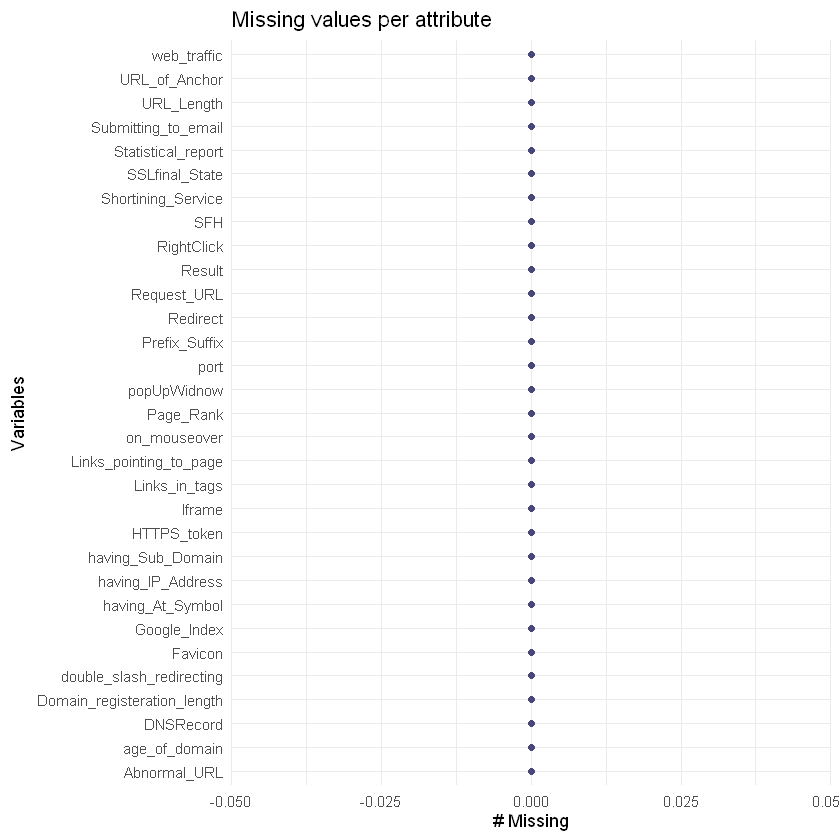

In [32]:
#We check to see if we have missing values to see what we do about it
library(naniar)

gg_miss_var(data) +
  labs(title = "Missing values per attribute")


In [48]:
############################################################     EXPLORTARORY ANALYSIS    ###############################################

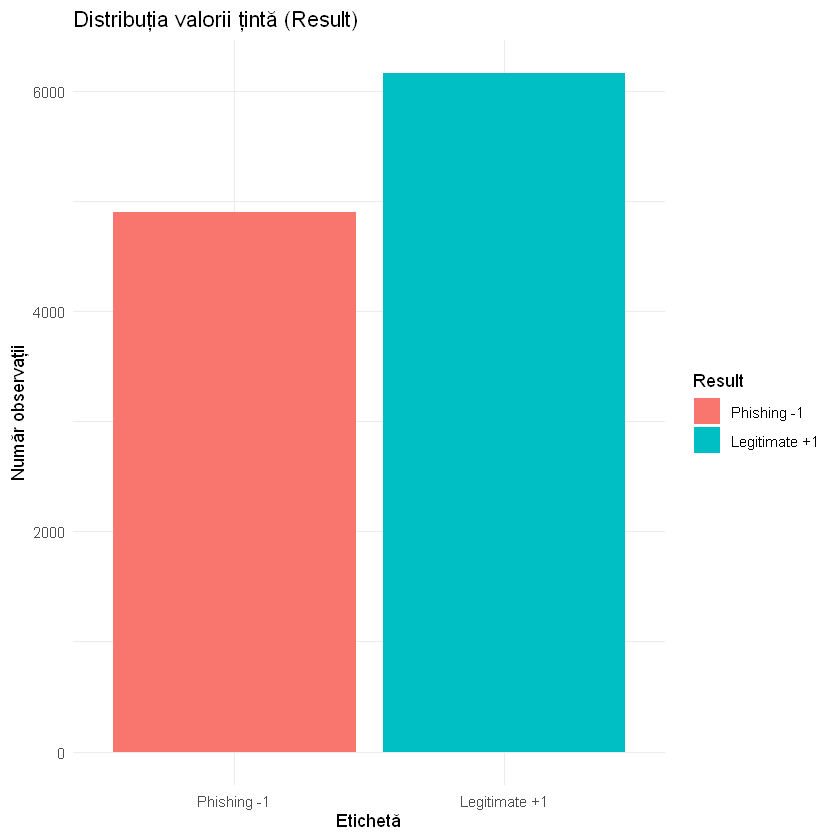

In [28]:
#1 How equilibrated is the database? Do we have a reasonable number of results of -1 and 1 or is there a discrepancy?
#A database that has significantly more results of -1 or 1 would make the ML learn in an imbalanced way
data %>%
  count(Result) %>%
  mutate(Result = factor(Result, levels = c(-1, 1),
                         labels = c("Phishing -1", "Legitimate +1"))) %>%
  ggplot(aes(x = Result, y = n, fill = Result)) +
  geom_col() +
  labs(title = "Distribuția valorii țintă (Result)",
       x = "Etichetă", y = "Număr observații") +
  theme_minimal()


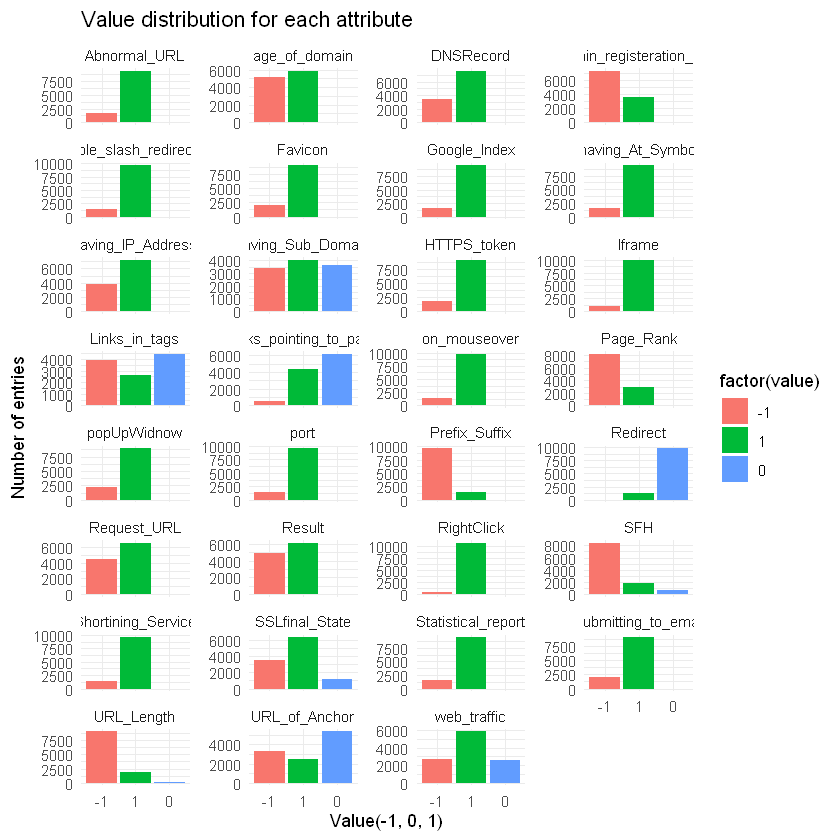

In [30]:
#2 Here we want to see for each attribute how many entries do we have of each value (-1,0,1) so to see if the data is imbalanced or redundant
#if an attribute only has values of 1 or -1 or 0 it can affect the algorithm
data %>%
  pivot_longer(cols = everything()) %>%
  count(name, value) %>%
  group_by(name) %>%
  mutate(percent = n / sum(n) * 100) %>%
  ggplot(aes(x = factor(value), y = n, fill = factor(value))) +
  geom_col() +
  facet_wrap(~ name, scales = "free_y", ncol = 4) +
  labs(title = "Value frequency for each attribute", x = "Value(-1, 0, 1)", y = "Number of entries") +
  theme_minimal()


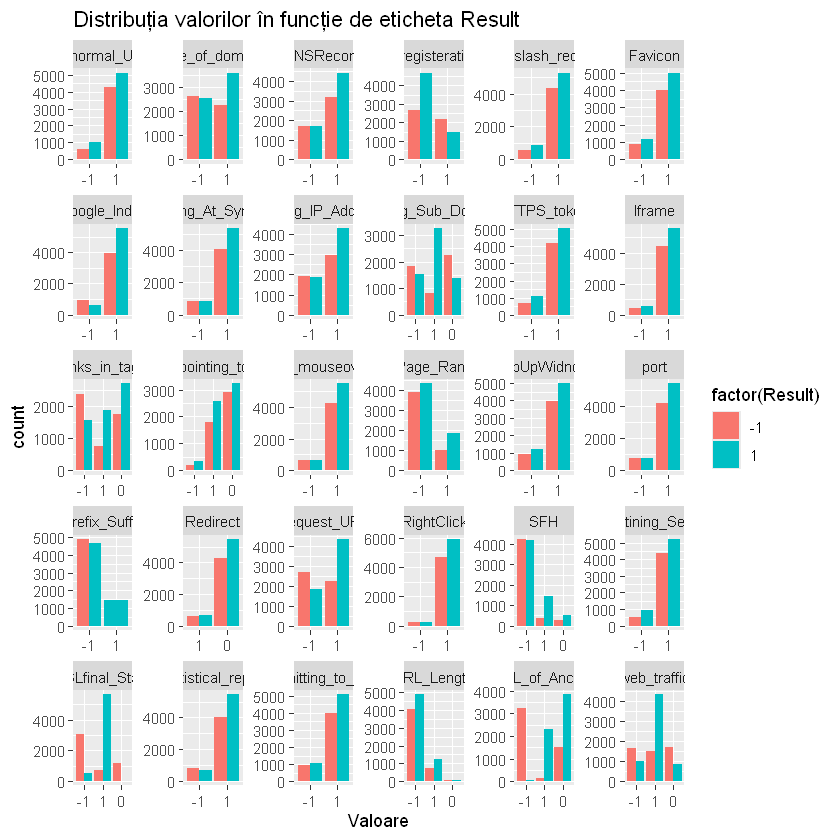

In [21]:
#3 How are the values of the attributes distributted when it comes to what the variable result was
#we wanted to see how well do our variables predict the final result 
#ex: if a variable is 1 - how many times the result was 1 and if a variable was -1 how many times was the result -1
data %>%
  pivot_longer(cols = -Result) %>%
  ggplot(aes(x = factor(value), fill = factor(Result))) +
  geom_bar(position = "dodge") +
  facet_wrap(~ name, scales = "free") +
  labs(title = "Distribuția valorilor în funcție de eticheta Result", x = "Valoare")


In [25]:
#looking at the result we can see that there are a few variables that predict the outcome much better and those appear to be: 
#: SSLfinal_State, URL_of_Anchor, web_traffic, having_Sub_Domain, Links_in_tags, Prefix_Suffix, Request_URL,SFH, Google_Index

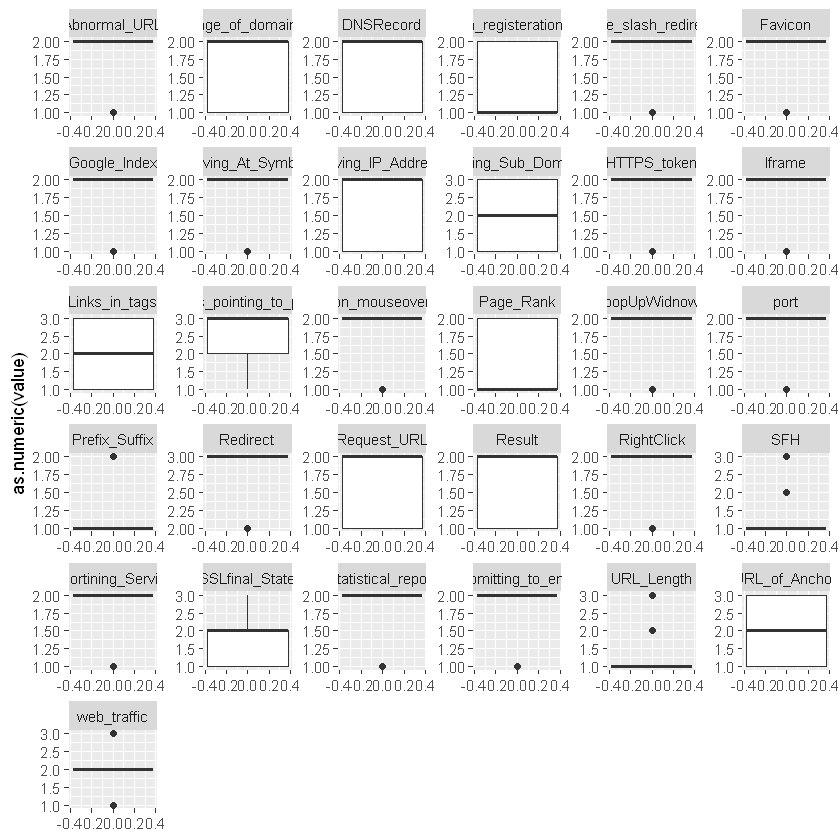

In [27]:
#4 Many types of analysis like boxplots can't be used to analyse this data as the values are nominal (even thought they seem numerical)
#as an example this representation doesn t tell us anything useful
data %>%
  pivot_longer(cols = everything()) %>%
  ggplot(aes(y = as.numeric(value))) +
  geom_boxplot() +
  facet_wrap(~ name, scales = "free")


In [52]:
#5 Correlations between variables - text
data %>%
  mutate(across(everything(), as.numeric)) %>%
  corrr::correlate() %>%
  corrr::shave() %>%
  corrr::fashion()


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,⋯,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,⋯,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
having_IP_Address,,,,,,,,,,⋯,,,,,,,,,,
URL_Length,-.05,,,,,,,,,⋯,,,,,,,,,,
Shortining_Service,.40,-.10,,,,,,,,⋯,,,,,,,,,,
having_At_Symbol,.16,-.08,.10,,,,,,,⋯,,,,,,,,,,
double_slash_redirecting,.40,-.08,.84,.09,,,,,,⋯,,,,,,,,,,
Prefix_Suffix,-.01,.06,-.08,-.01,-.09,,,,,⋯,,,,,,,,,,
having_Sub_Domain,-.08,.00,-.04,-.06,-.04,.09,,,,⋯,,,,,,,,,,
SSLfinal_State,.07,.05,-.06,.03,-.04,.26,.27,,,⋯,,,,,,,,,,
Domain_registeration_length,-.02,-.22,.06,.02,.05,-.10,-.08,-.19,,⋯,,,,,,,,,,


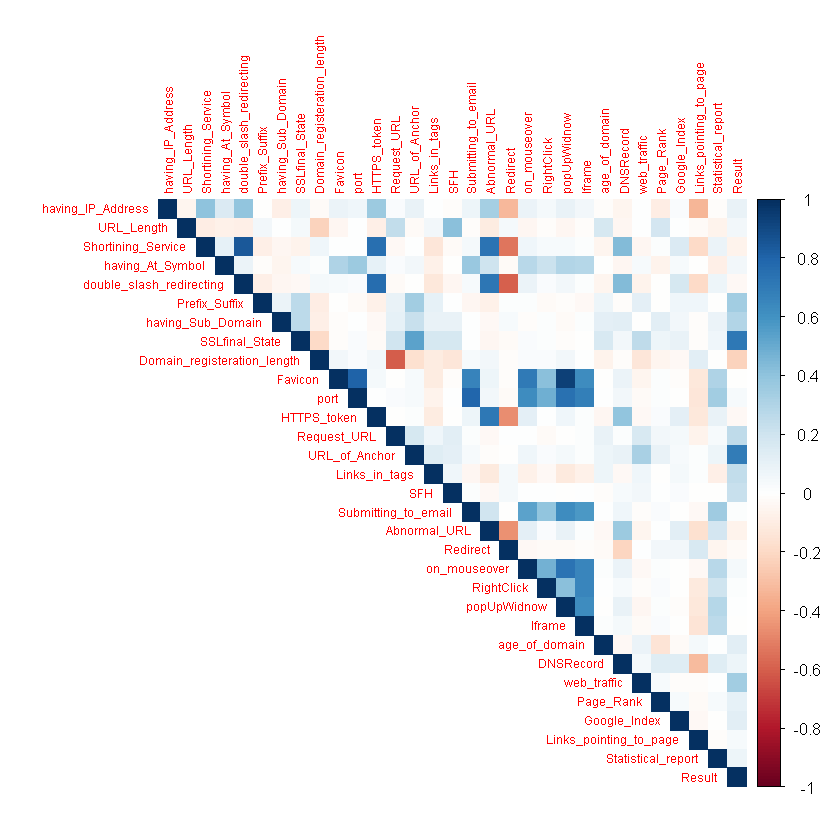

In [54]:
#6 Correlation Matrix - vizual with colours
corrplot(
  cor(ph %>% mutate(across(everything(), as.numeric))),
  method = "color",
  type = "upper",
  tl.cex = 0.6,
  number.cex = 0.6
)


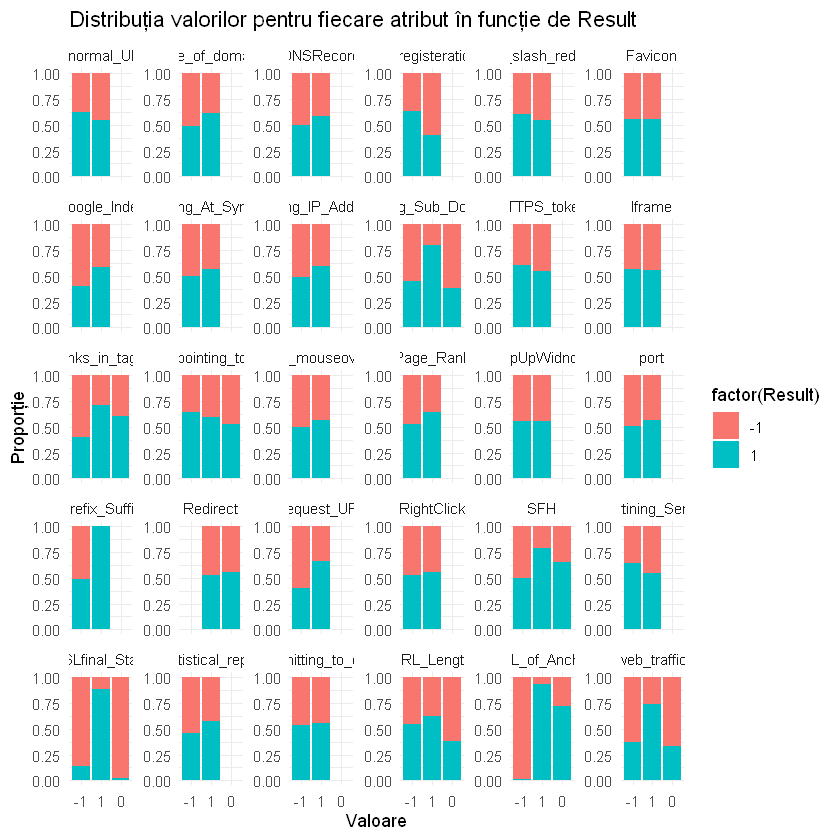

In [56]:
#7 Bivariate analysis - how well do the attributes predict the Result Variable
ph %>%
  pivot_longer(cols = -Result) %>%
  ggplot(aes(x = factor(value), fill = factor(Result))) +
  geom_bar(position = "fill") +
  facet_wrap(~ name, scales = "free_y") +
  labs(title = "Distribuția valorilor pentru fiecare atribut în funcție de Result",
       y = "Proporție", x = "Valoare") +
  theme_minimal()


In [57]:
################################################################################     Visual Analysis  ######################################################################

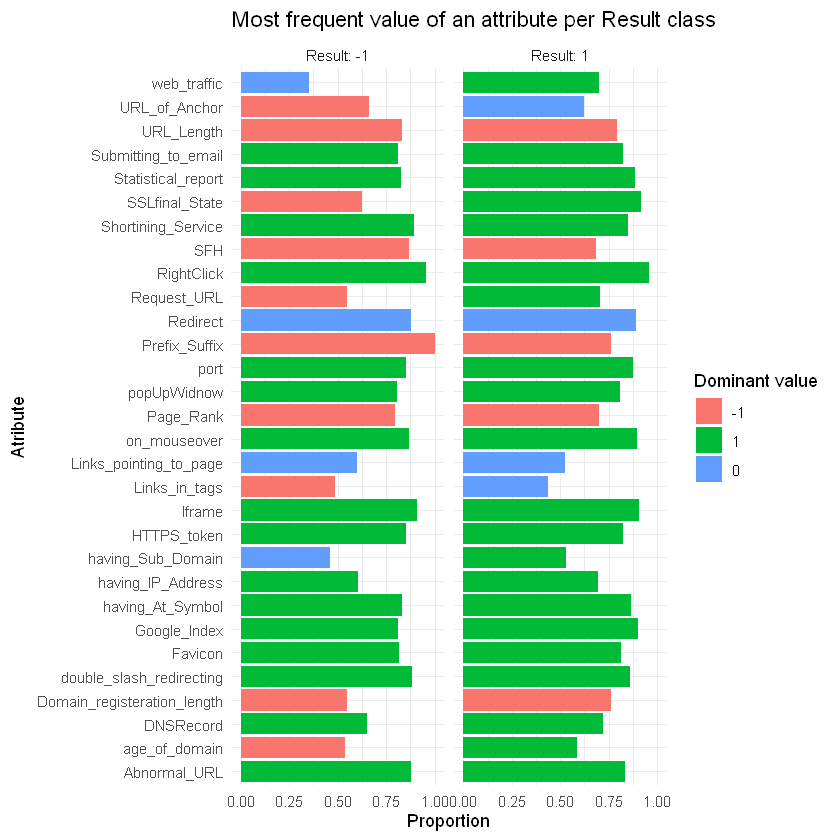

In [43]:
#8 Dacă o variabilă are valoare dominantă diferită pentru Result = -1 și Result = 1, atunci e un bun predictor.
#Dacă are aceeași valoare dominantă indiferent de Result, e redundantă sau neinformativă.

library(dplyr)
library(tidyr)
library(ggplot2)

# Prepare data
data_long <- data %>%
  pivot_longer(cols = -Result, names_to = "Variable", values_to = "Value") %>%
  group_by(Result, Variable, Value) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Result, Variable) %>%
  mutate(prop = count / sum(count)) %>%
  filter(prop == max(prop))  # doar valoarea dominantă

# Visualisation: Most frequent value for each attribute for each class
ggplot(data_long, aes(x = Variable, y = prop, fill = factor(Value))) +
  geom_col(position = "dodge") +
  facet_wrap(~ Result, labeller = label_both) +
  coord_flip() +
  labs(title = "Most frequent value of an attribute per Result class",
       x = "Atribute", y = "Proportion", fill = "Dominant value") +
  theme_minimal(base_size = 11) 


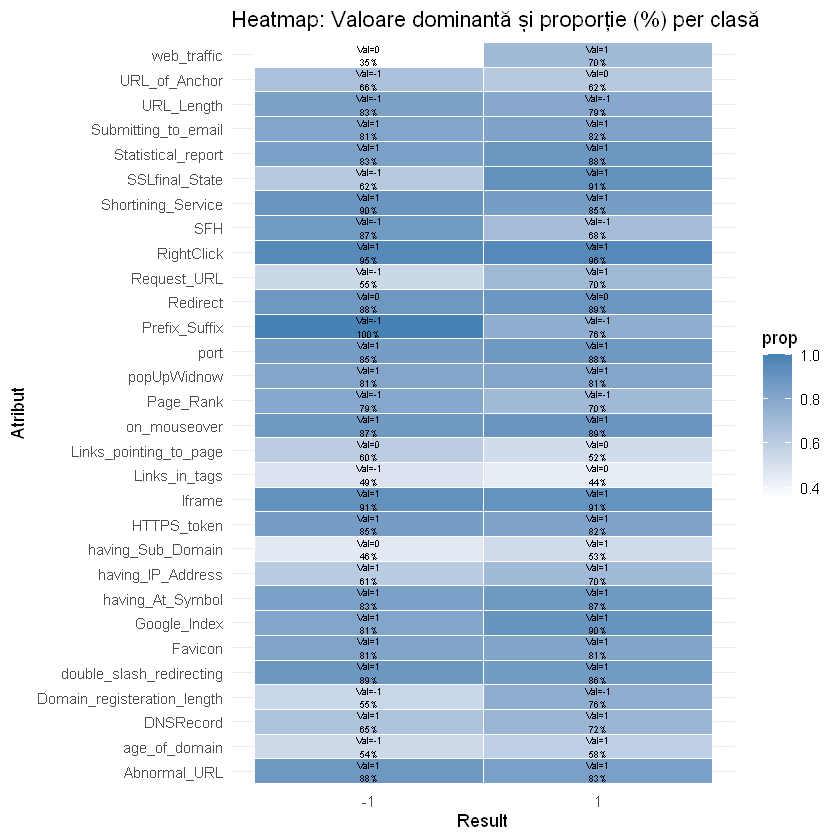

In [45]:
#9 We analyse the dominant value for each result and we analyse the consistency with the class - like a predictibility score 
data_long <- data %>%
  pivot_longer(cols = -Result, names_to = "Variable", values_to = "Value") %>%
  group_by(Result, Variable, Value) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Result, Variable) %>%
  mutate(prop = count / sum(count)) %>%
  filter(prop == max(prop)) %>%
  ungroup()

# Heatmap
ggplot(data_long, aes(x = as.factor(Result), y = Variable, fill = prop)) +
  geom_tile(color = "white") +
  geom_text(aes(label = paste0("Val=", Value, "\n", round(prop * 100), "%")), size = 2) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Heatmap: Valoare dominantă și proporție (%) per clasă", x = "Result", y = "Atribut") +
  theme_minimal(base_size = 11)


In [81]:
#10 The analysis of the value distribution for the attributes visibly strongly correlated with the Result:
# SSLfinal_State, URL_of_Anchor, web_traffic, having_sub_Domain, Preffix_Suffix, Request_URL, SFH, Google_Index

`geom_smooth()` using formula = 'y ~ x'


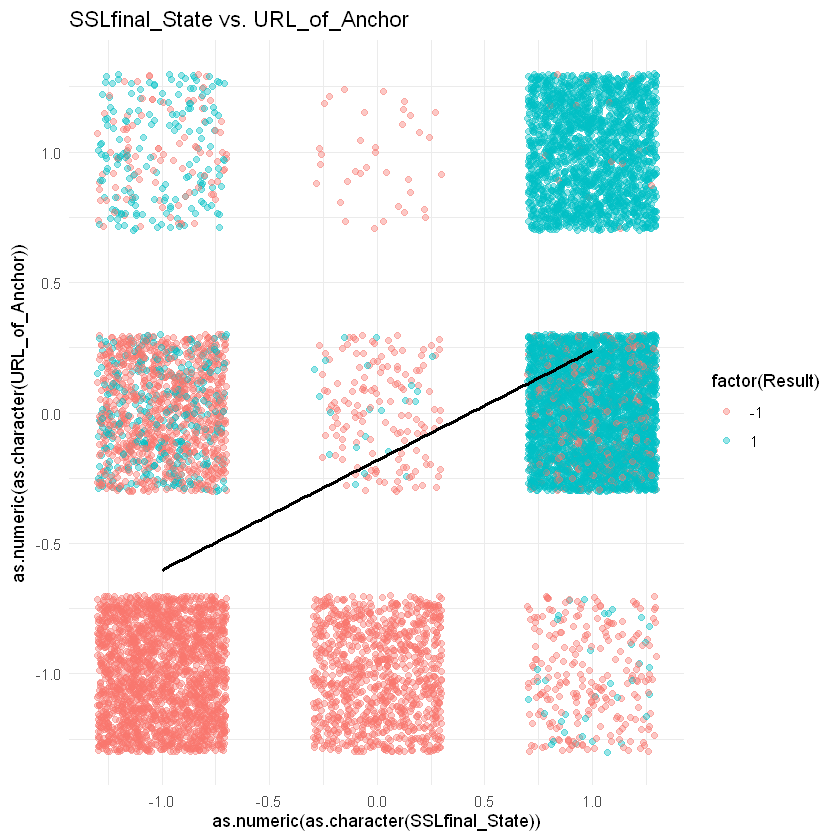

In [86]:
# Visualise how two variables that we established they are very good at predicting the outcome would predict the outcome: 
ggplot(data, aes(
  x = as.numeric(as.character(SSLfinal_State)),
  y = as.numeric(as.character(URL_of_Anchor)),
  color = factor(Result))
) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.4) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "SSLfinal_State vs. URL_of_Anchor") +
  theme_minimal()

In [71]:
#[Q9] Vizualizarea relațiilor între perechi de variabile predictive și eticheta Result prin scatter plots
# pereche în care variabielele fac parte din lista noastră

`geom_smooth()` using formula = 'y ~ x'


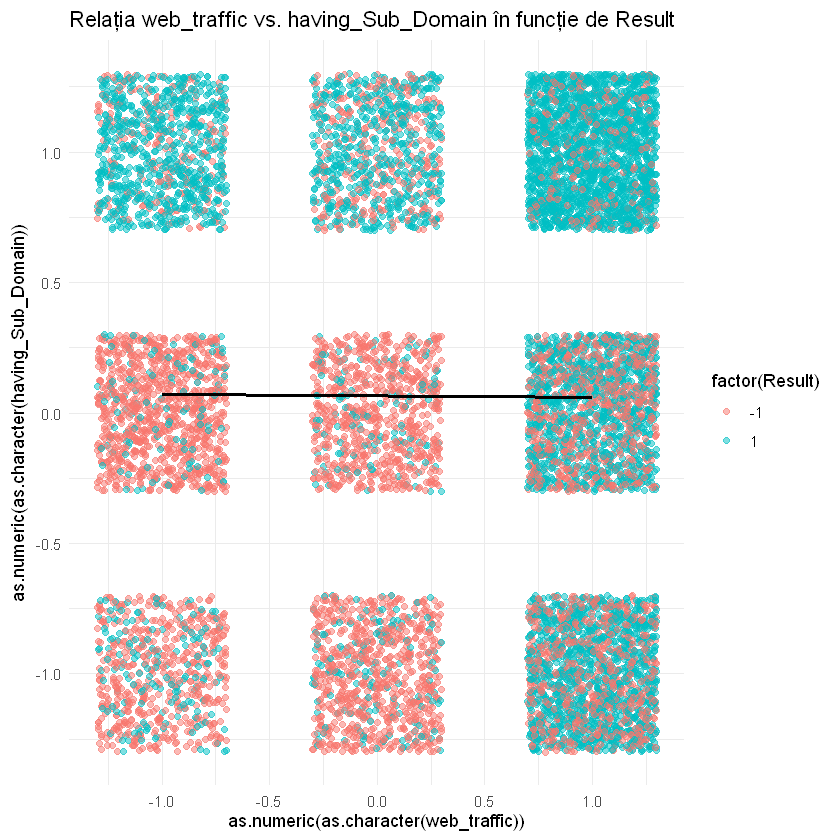

In [85]:
ggplot(data, aes(
  x = as.numeric(as.character(web_traffic)),
  y = as.numeric(as.character(having_Sub_Domain)),
  color = factor(Result))
) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Relația web_traffic vs. having_Sub_Domain în funcție de Result") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


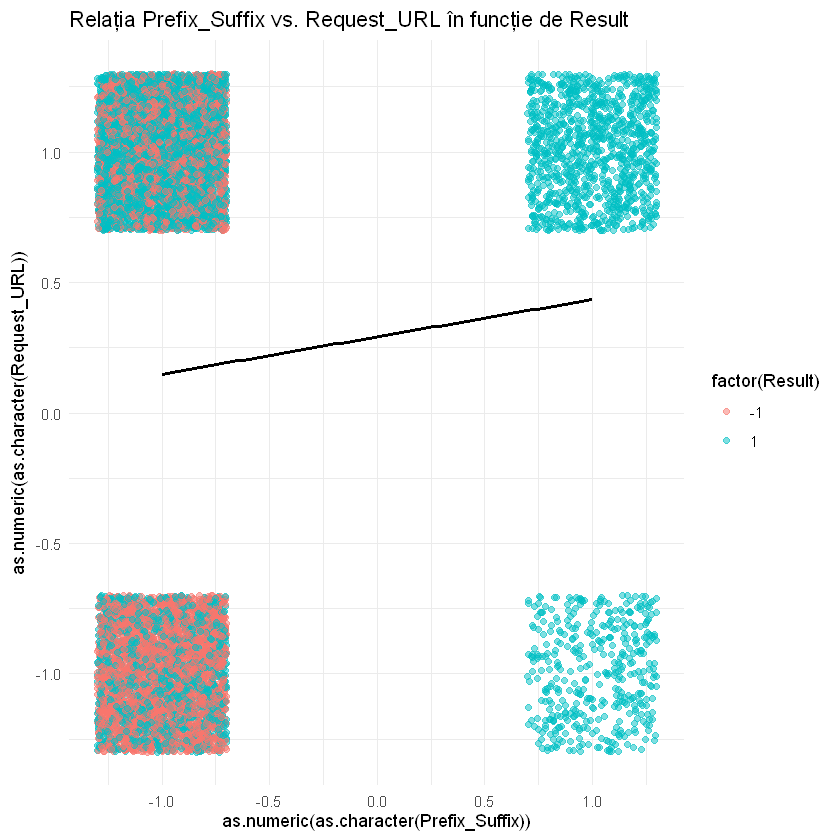

In [87]:
ggplot(data, aes(
  x = as.numeric(as.character(Prefix_Suffix)),
  y = as.numeric(as.character(Request_URL)),
  color = factor(Result))
) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Relația Prefix_Suffix vs. Request_URL în funcție de Result") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


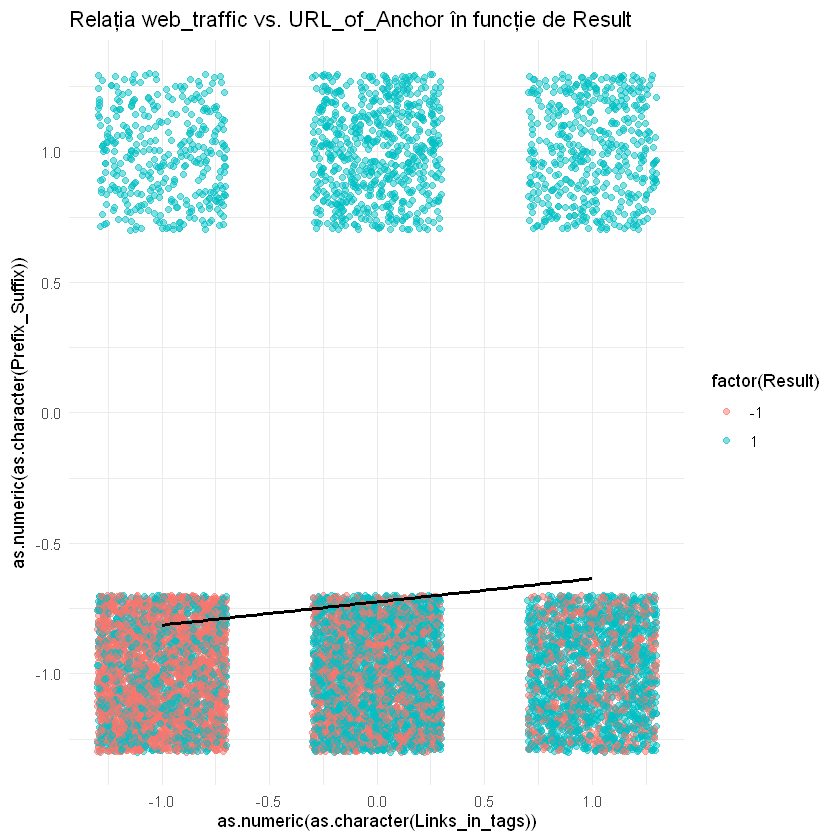

In [74]:
ggplot(ph, aes(
  x = as.numeric(as.character(Links_in_tags)),
  y = as.numeric(as.character(Prefix_Suffix)),
  color = factor(Result))
) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Relația web_traffic vs. URL_of_Anchor în funcție de Result") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


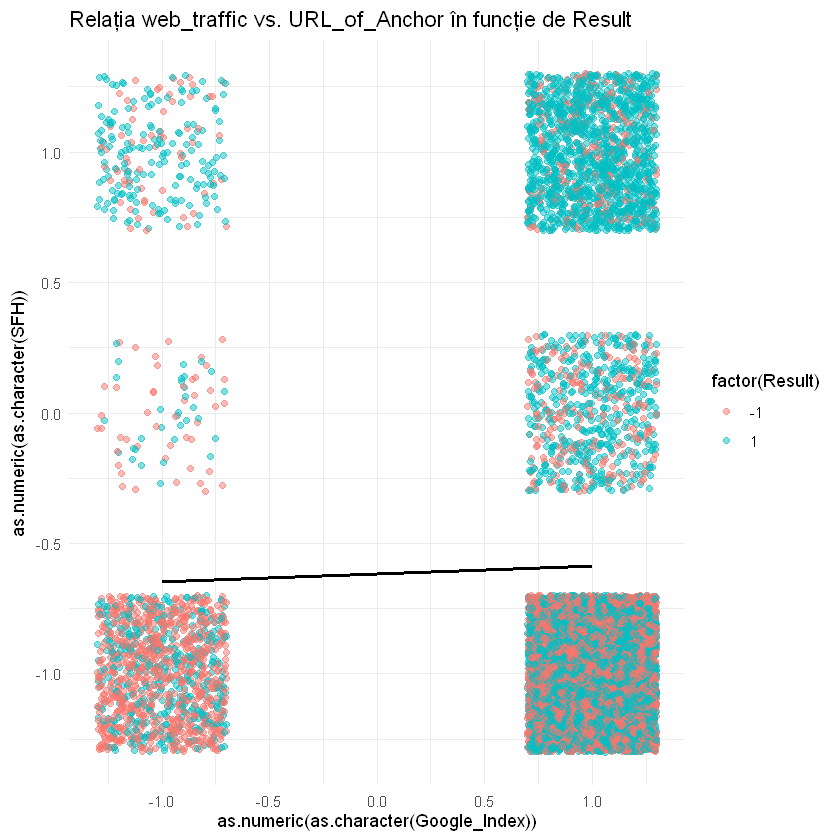

In [90]:
ggplot(data, aes(
  x = as.numeric(as.character(Google_Index)),
  y = as.numeric(as.character(SFH)),
  color = factor(Result))
) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Relația web_traffic vs. URL_of_Anchor în funcție de Result") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


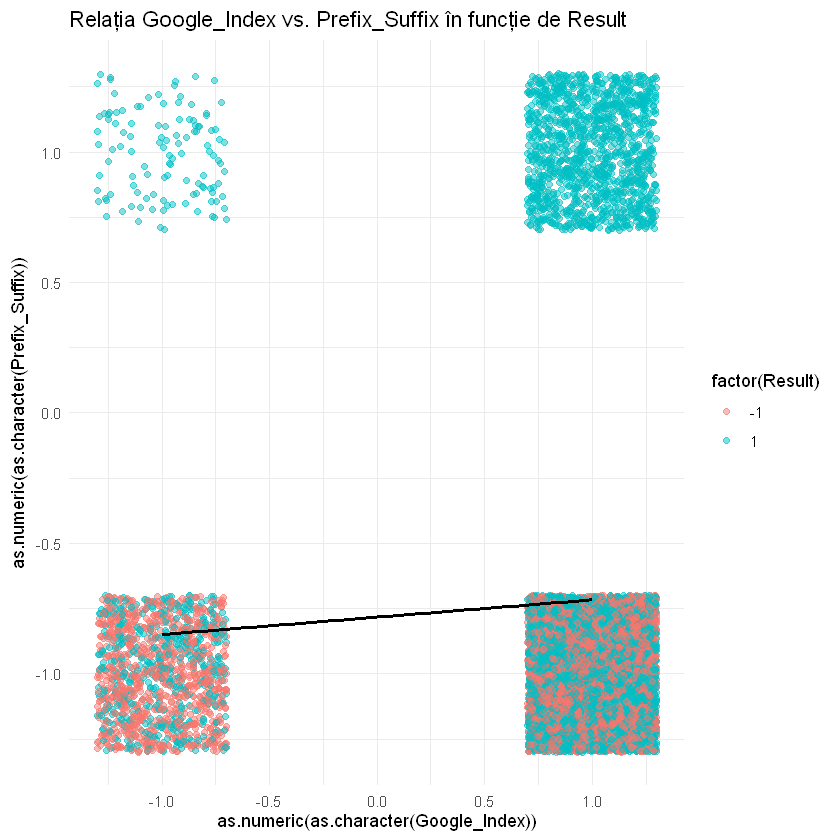

In [89]:
# Am ales împreună aceste 2 variabile deoarece Google_Index ”se pricepe” în identificarea valorilor -1 iar Prefix_Suffix în identificarea valorilor 1
ggplot(data, aes(
  x = as.numeric(as.character(Google_Index)),
  y = as.numeric(as.character(Prefix_Suffix)),
  color = factor(Result))
) +
  geom_jitter(width = 0.3, height = 0.3, alpha = 0.5) +
  geom_smooth(method = "lm", se = FALSE, color = "black") +
  labs(title = "Relația Google_Index vs. Prefix_Suffix în funcție de Result") +
  theme_minimal()

In [77]:
################################################################################     ML Trainning   ######################################################################

In [91]:
install.packages("ranger")
install.packages("tidymodels")
install.packages("vip")
install.packages("broom")

Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ranger' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Warning message:
"package 'tidymodels' is in use and will not be installed"
Installing package into 'C:/Users/anama/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'vip' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anama\AppData\Local\Temp\Rtmpgzvayt\downloaded_packages


Warning message:
"package 'broom' is in use and will not be installed"


In [102]:
library(ranger)  
library(xgboost)  
library(tidyverse)
library(broom)
library(tidymodels)
library(vip)
library(DALEXtra)
options(scipen = 999)

In [103]:
#1 LOADING DATA -
data_path="C:/Users/anama/Desktop/BigData&ML/Proiect ML"
read_arff_file <- function(data_path, file_name) {
  data <- read.arff(file.path(data_path, file_name))
  return(data)
}
data <- read_arff_file(data_path, "phishing-websites.arff")

In [104]:
glimpse(data)

Rows: 11,055
Columns: 31
$ having_IP_Address           <fct> -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, …
$ URL_Length                  <fct> 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, …
$ Shortining_Service          <fct> 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, …
$ having_At_Symbol            <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ double_slash_redirecting    <fct> -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, …
$ Prefix_Suffix               <fct> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1…
$ having_Sub_Domain           <fct> -1, 0, -1, -1, 1, 1, -1, -1, 1, -1, 0, 1, …
$ SSLfinal_State              <fct> -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, …
$ Domain_registeration_length <fct> -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1…
$ Favicon                     <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ port                        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ HTTPS_token                 <fct> -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1,…
$ Request_URL  

In [105]:
# 2. create train test split

set.seed(1234) # if another person wants to replicate the experiment on another machine
splits <- initial_split(data, prop = 0.75, strata = Result) 
train_tbl <- training(splits)
test_tbl  <- testing(splits)

In [106]:
# check the proportions on the two sets to see how the values of the variable Result are distributed
prop.table(table(train_tbl$Result))
prop.table(table(test_tbl$Result))



       -1         1 
0.4430639 0.5569361 


      -1        1 
0.443038 0.556962 

In [107]:
#3. cross-validation folds
#create 25 subfolds - 5 folds repeated 5 times - robust the tunning and avoid overfitting
set.seed(1234)
cv_train <- vfold_cv(train_tbl, v = 5, repeats = 5, strata = Result)
print(as_tibble(cv_train))


# A tibble: 25 × 3
   splits              id      id2  
   <list>              <chr>   <chr>
 1 <split [6631/1659]> Repeat1 Fold1
 2 <split [6631/1659]> Repeat1 Fold2
 3 <split [6632/1658]> Repeat1 Fold3
 4 <split [6633/1657]> Repeat1 Fold4
 5 <split [6633/1657]> Repeat1 Fold5
 6 <split [6631/1659]> Repeat2 Fold1
 7 <split [6631/1659]> Repeat2 Fold2
 8 <split [6632/1658]> Repeat2 Fold3
 9 <split [6633/1657]> Repeat2 Fold4
10 <split [6633/1657]> Repeat2 Fold5
# ℹ 15 more rows


In [108]:
#4. Create recipe
the_recipe <- recipe(Result ~ ., data = train_tbl) %>%
  step_dummy(all_nominal(), -all_outcomes()) %>%  # convert factors into dummy variables
  step_zv(all_predictors())                      
  #step_impute_knn(all_predictors(), neighbors = 3) %>% # not needed as we don t have NA s

In [109]:
#5. Models Specification
# Random Forest – cu hiperparametri mtry și min_n tunabili
#XGBoost – tree_depth, min_n, loss_reduction, 
# sample_size, mtry, learn_rate

## Random Forest
rf_spec <- parsnip::rand_forest(
     mtry = tune(), 
     trees = 300,
     min_n = tune()     
          ) %>%
     set_engine("ranger", importance = "impurity") %>%
     set_mode("classification")
rf_spec


### XGBoost
xgb_spec <- parsnip::boost_tree(
    trees = 300, 
    tree_depth = tune(), min_n = tune(), 
    loss_reduction = tune(),                     ## model complexity
    sample_size = tune(), mtry = tune(),         ## randomness
    learn_rate = tune()                         ## step size
    ) %>% 
    set_engine("xgboost") %>% 
    set_mode("classification")
xgb_spec

Random Forest Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = 300
  min_n = tune()

Engine-Specific Arguments:
  importance = impurity

Computational engine: ranger 


Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = 300
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()
  sample_size = tune()

Computational engine: xgboost 


In [110]:
#6. Parameter grids Specifications
#Definirea unui număr limitat de combinații de hiperparametri (20 pentru RF, 60 pentru XGBoost), 
#astfel încât tune_grid() să nu dureze ore întregi.
## for Random Forest models
set.seed(1234)
rf_grid <- dials::grid_random(
    finalize(mtry(), train_tbl %>% select (-Result)),
    min_n(),  
    size = 20)  

rf_grid

mtry,min_n
<int>,<int>
28,15
16,5
26,5
22,22
5,21
12,4
15,37
9,32
5,30


In [111]:
##  for XGBoost models
set.seed(1234)
xgb_grid <- dials::grid_random(
    tree_depth(),
    min_n(),
    loss_reduction(),
    sample_size = sample_prop(),
    finalize(mtry(), train_tbl %>% select (-Result)),
    learn_rate(),
    size = 60  
)
xgb_grid

tree_depth,min_n,loss_reduction,sample_size,mtry,learn_rate
<int>,<int>,<dbl>,<dbl>,<int>,<dbl>
12,5,0.0000000560784313,0.2765572,29,0.000003382957462
10,5,0.0133256406843314,0.9087224,19,0.000002969583617
6,22,0.0000003492124408,0.4505498,6,0.000000073453465
5,21,0.0000705175159063,0.3797837,5,0.045709391737602
12,4,0.0000000003925872,0.2440258,27,0.000050920694013
15,37,0.0003108516376648,0.9065673,12,0.000000001402493
9,32,0.0000000024947220,0.2497544,8,0.000000641834332
5,30,1.8519036571485865,0.9103821,16,0.016937612256761
6,6,0.0000000001473036,0.2206704,28,0.000001622299372


In [112]:
#7. Assemble the models with workflows
# Random forest
wf_rf <- workflow() %>%
    add_recipe(the_recipe) %>%
    add_model(rf_spec) 


# XGBoost
wf_xgb <- workflow() %>%
    add_recipe(the_recipe) %>%
    add_model(xgb_spec) 

In [92]:
# trainning time: 

In [ ]:
#8. Fit the models for all cross-validation folds
# Random forest 
set.seed(1234)
rf_resamples <- wf_rf %>% 
    tune_grid(
        resamples = cv_train,
        grid = rf_grid,
        control = control_grid(save_pred = TRUE)
              )
rf_resamples
# temp <- rf_resamples$.notes[[1]][1]
# temp$.notes[1]


# XGBoost model, `original` data set
set.seed(1234)
xgb_resamples <- wf_xgb %>% 
    tune_grid(
        resamples = cv_train,
        grid = xgb_grid,
        control = control_grid(save_pred = TRUE)
              )
xgb_resamples

Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values will be ignored."
Warning message:
"`optional` is kept for consistency with the underlying class but TRUE values w

In [ ]:
# 9. Model Evaluation
# each model s performance
# Accuracy: wright predictions proportion
# F1 Score: echilibrul între precizie și recall, util în cazul dezechilibrului de clase
# ROC AUC: măsoară capacitatea modelului de a diferenția între clase (bazat pe probabilități)
rf_resamples %>% 
    collect_metrics()


In [ ]:
xgb_resamples %>% 
    collect_metrics()

In [ ]:
#10 roc curves
df_auc <- bind_rows(
    rf_resamples %>%
        collect_predictions() %>%
        group_by(id) %>%
        roc_curve(Result, '.pred_-1')  %>%
        mutate (model = 'random forest'),
    xgb_resamples %>%
        collect_predictions() %>%
        group_by(id) %>%
        roc_curve(Result, '.pred_-1')  %>%
        mutate (model = 'xgboost')
  ) %>%
  ggplot(aes(1 - specificity, sensitivity, color = id)) +
  geom_abline(lty = 2, color = "gray80", linewidth = 1) +
  geom_path(show.legend = FALSE, alpha = 0.5, linewidth = 1) +
  coord_equal() +
  facet_wrap(~ model)

df_auc

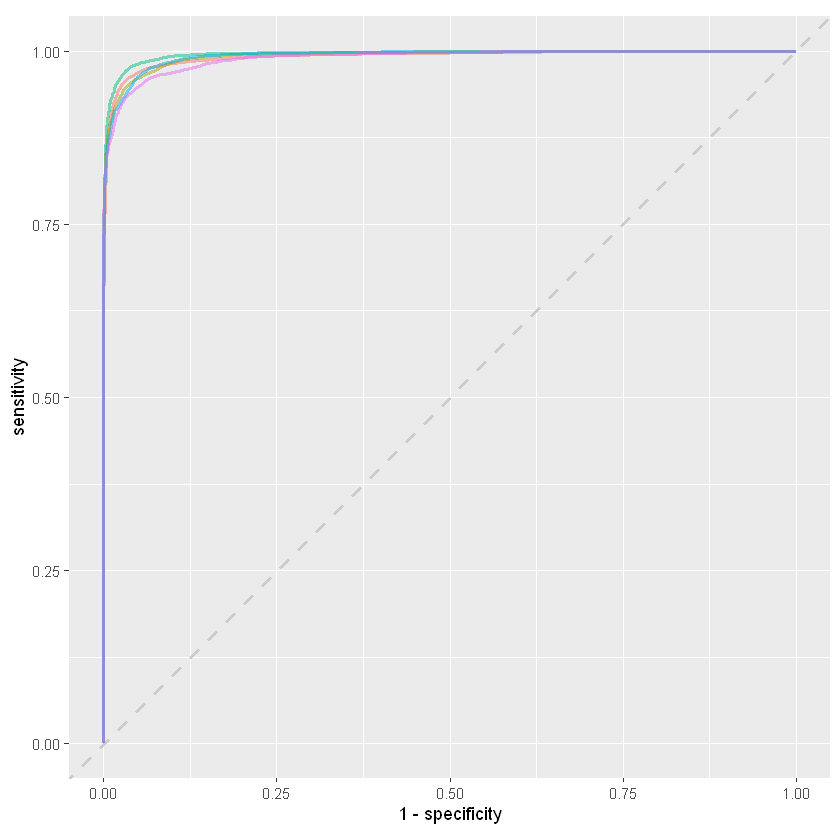

In [110]:
#11 se observa ca modelul Random Forest prezice mai bine variabila Rezultat
rf_resamples %>%
  collect_predictions() %>%
  group_by(id) %>%
  roc_curve(Result, '.pred_-1') %>%
  ggplot(aes(1 - specificity, sensitivity, color = id)) +
  geom_abline(lty = 2, color = "gray80", linewidth = 1) +
  geom_path(show.legend = FALSE, alpha = 0.5, linewidth = 1) +
  coord_equal()

In [115]:
#12 observăm clar că Random Forest diferențiază mai bine între clase
bind_rows(
  test__rf %>% collect_predictions() %>% mutate(model = "RF"),
  test__xgb %>% collect_predictions() %>% mutate(model = "XGB")
) %>%
group_by(model) %>%
roc_auc(truth = Result, '.pred_-1')  


model,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
RF,roc_auc,binary,0.9960
XGB,roc_auc,binary,0.9915


In [95]:
#13. Choose the best combination of hyper-parameter values
best_rf <- rf_resamples %>%
  select_best(metric = "roc_auc")

best_xgb <- xgb_resamples %>%
  select_best(metric = "roc_auc")


In [96]:
best_rf

mtry,min_n,.config
<int>,<int>,<chr>
12,4,Preprocessor1_Model06


In [97]:
best_xgb

mtry,min_n,tree_depth,learn_rate,loss_reduction,sample_size,.config
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
9,9,6,0.07124,0.0000004869,0.3787,Preprocessor1_Model15


In [98]:
#14. Finalize the models - le completam cu cei mai buni parametri
rf_model_wflow_fit <- finalize_workflow(wf_rf, best_rf)
xgb_model_wflow_fit <- finalize_workflow(wf_xgb, best_xgb)

In [101]:
#15 Salvează modelul Random Forest
#saveRDS(rf_model_wflow_fit, file = "rf_model_final.rds")

# Salvează modelul XGBoost
#saveRDS(xgb_model_wflow_fit, file = "xgb_model_final.rds")

# Încarcă modelul Random Forest
rf_model_wflow_fit <- readRDS("rf_model_final.rds")

# Încarcă modelul XGBoost
xgb_model_wflow_fit <- readRDS("xgb_model_final.rds")


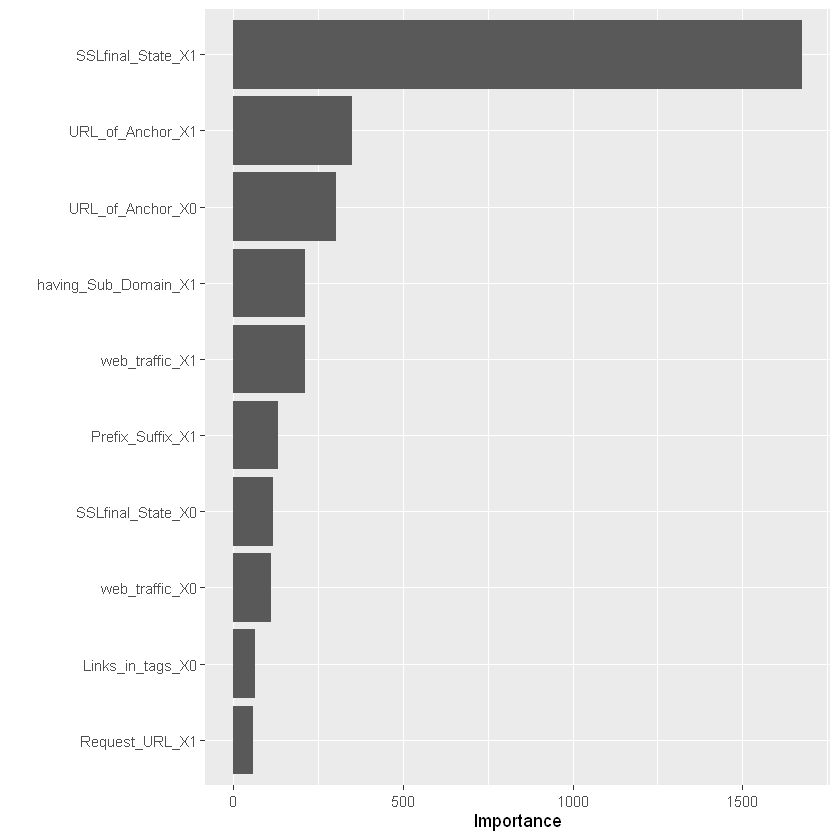

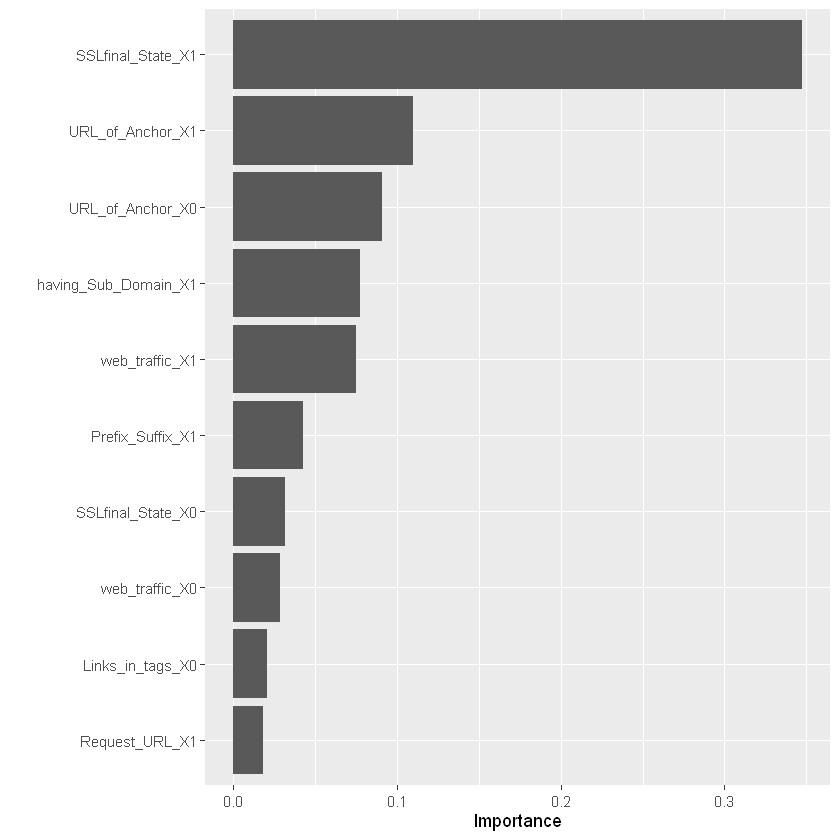

In [99]:
#16. Variable importance
#VIP (Variable Importance Plot): identifică variabilele cele mai influente pentru fiecare model
rf_model_wflow_fit %>% 
    fit(data = train_tbl) %>%
    extract_fit_parsnip() %>% 
    vip::vip() 


xgb_model_wflow_fit %>% 
    fit(data = train_tbl) %>%
    extract_fit_parsnip() %>% 
    vip::vip()

In [100]:
#17. Model performance on the test set
test__rf <- rf_model_wflow_fit %>% last_fit(splits) 
test__rf %>% collect_metrics() 

test__xgb <- xgb_model_wflow_fit %>% last_fit(splits) 
test__xgb %>% collect_metrics()


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.96890,Preprocessor1_Model1
roc_auc,binary,0.99595,Preprocessor1_Model1
brier_class,binary,0.02407,Preprocessor1_Model1


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.95045,Preprocessor1_Model1
roc_auc,binary,0.99145,Preprocessor1_Model1
brier_class,binary,0.03631,Preprocessor1_Model1


In [102]:
#18 Extragem predicțiile
rf_preds <- test__rf %>% collect_predictions()
xgb_preds <- test__xgb %>% collect_predictions()


In [104]:
#19 Confusion Matrix: indică numărul de exemple corect/greșit clasificate (TP, FP, FN, TN)
conf_mat(rf_preds, truth = Result, estimate = .pred_class)
conf_mat(xgb_preds, truth = Result, estimate = .pred_class)


          Truth
Prediction   -1    1
        -1 1167   28
        1    58 1512

          Truth
Prediction   -1    1
        -1 1143   55
        1    82 1485

In [103]:
#20 Accuracy
accuracy(rf_preds, truth = Result, estimate = .pred_class)
accuracy(xgb_preds, truth = Result, estimate = .pred_class)

#21 F1 Score
f_meas(rf_preds, truth = Result, estimate = .pred_class)
f_meas(xgb_preds, truth = Result, estimate = .pred_class)


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9689


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9505


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.9645


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
f_meas,binary,0.9435


In [118]:
library(DALEXtra)
#22 Creezi explainers
expl_rf <- explain_tidymodels(
  rf_model_wflow_fit %>% fit(train_tbl),
  data = train_tbl %>% select(-Result),
  y = train_tbl$Result,
  label = "Random Forest"
)

expl_xgb <- explain_tidymodels(
  xgb_model_wflow_fit %>% fit(train_tbl),
  data = train_tbl %>% select(-Result),
  y = train_tbl$Result,
  label = "XGBoost"
)

Preparation of a new explainer is initiated
  -> model label       :  Random Forest 
  -> data              :  8290  rows  30  cols 
  -> target variable   :  8290  values 
  -> predict function  :  yhat.workflow  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package tidymodels , ver. 1.3.0 , task classification (  default  ) 
  -> model_info        :  Model info detected classification task but 'y' is a factor .  (  WARNING  )
  -> model_info        :  By deafult classification tasks supports only numercical 'y' parameter. 
  -> model_info        :  Consider changing to numerical vector with 0 and 1 values.
  -> model_info        :  Otherwise I will not be able to calculate residuals or loss function.
  -> predicted values  :  numerical, min =  0 , mean =  0.5577 , max =  1  
  -> residual function :  difference between y and yhat (  default  )


Warning message in Ops.factor(y, predict_function(model, data)):
"'-' not meaningful for factors"


  -> residuals         :  numerical, min =  NA , mean =  NA , max =  NA  
  A new explainer has been created!  
Preparation of a new explainer is initiated
  -> model label       :  XGBoost 
  -> data              :  8290  rows  30  cols 
  -> target variable   :  8290  values 
  -> predict function  :  yhat.workflow  will be used (  default  )
  -> predicted values  :  No value for predict function target column. (  default  )
  -> model_info        :  package tidymodels , ver. 1.3.0 , task classification (  default  ) 
  -> model_info        :  Model info detected classification task but 'y' is a factor .  (  WARNING  )
  -> model_info        :  By deafult classification tasks supports only numercical 'y' parameter. 
  -> model_info        :  Consider changing to numerical vector with 0 and 1 values.
  -> model_info        :  Otherwise I will not be able to calculate residuals or loss function.
  -> predicted values  :  numerical, min =  0.00007176 , mean =  0.5559 , max =  0.9997  


Warning message in Ops.factor(y, predict_function(model, data)):
"'-' not meaningful for factors"


  -> residuals         :  numerical, min =  NA , mean =  NA , max =  NA  
  A new explainer has been created!  
